In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/양인순 교수님/day1_tabular_mdp
%ls

/content/drive/MyDrive/Colab Notebooks/양인순 교수님/day1_tabular_mdp
chap2_tabular_mdp.pdf  pendulum.py   tabular_mdp_full.ipynb
gridworld.py           __pycache__/  tabular_mdp.ipynb
gym_test.py            solvers.py    utils.py


In [13]:
import numpy as np
import time
from utils import *

# 1. Prerequisites

## 1.1 Toy Example

In [14]:
R = np.array([[-2.0, -0.5],
              [-1.0, -3.0]])

P = np.array([[0.75, 0.25],
              [0.75, 0.25],
              [0.25, 0.75],
              [0.25, 0.75]])

gamma = 0.9

## 1.2 Define Q-function and Greedy policy
First define Q-function from the value function:
$$Q(s, a) = r(s, a) + \gamma \sum_{s^\prime} p(s^\prime \mid s, a) v(s^\prime)$$

Greedy policy from Q-function: $\pi_{\text{greedy}}(s) = \arg\max_a Q(s, a)$.

In [15]:
def q_ftn(P, R, gamma, v):
    """
    given v, get corresponding q
    hint : v's shape = (|S|, 1)
           P's shape = (|S| * |A|, |S|)
           R's shape = (|S|, |A|)
           [Fill here]'s shape = (|S| * |A|, 1)
           numpy.matmul(A, x) returns a matrix multiplication result A * x.
    """
    # TODO 1: Complete the following line.

    #return
    #return R + gamma * np.reshape(np.matmul(P, v), newshape=R.shape, order='F')
    return R + gamma * np.reshape(P@v, newshape=R.shape, order='F')

def greedy(P, R, gamma, v):
    """
    construct greedy policy by pi(s) = argmax_a q(s, a)
    """
    # TODO 2: Complete the following line.
    #q =
    #pi =
    q = q_ftn(P, R, gamma, v)
    pi = np.argmax(q, axis=1)

    return pi

# 2. Value Iteration

Value iteration iteratively applies the *Bellman Optimality Operator*

\begin{equation*}
\mathcal{T}v\,(s) := \max_{a \in \mathcal{A}}\bigg[ r\,(s,a) + \gamma \sum_{s'\in\mathcal{S}} p\,(s'|s,a)\;v\,(s') \bigg]
\end{equation*}

From calculated $v^*$, we can calculate $\pi^*$ by Q-function

$$ \pi^* := \arg\max_{a\in\mathcal{A}} Q^*(s,a) $$

In [16]:
EPS = 1e-6
nS, nA = R.shape
# Initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

# Value Iteration
count = 0
start = time.time()
while True:
    v_next = bellman_update(P, R, gamma, v)
    # TODO 3: Fill the blank below.
    #if np.linalg.norm("""blank""", ord=np.inf) < EPS:
    if np.linalg.norm(v - v_next, ord=np.inf) < EPS:
        break
    #v =
    v = v_next
    count += 1
print('Iteration terminated in {} steps, Ellapsed time {:4f} sec\n'.format(count, time.time() - start))

# TODO 4: Construct policy with obtained v^* .
#pi =
pi = greedy(P, R, gamma, v)
print_result(v, pi)

Iteration terminated in 129 steps, Ellapsed time 0.005796 sec

+========== Result ==========+
optimal value function : 
v(s1) = -7.327576823826019
v(s2) = -7.672404410032915
optimal policy : 
pi(s1) = a2
pi(s2) = a1


<ipython-input-16-47c29caafa99>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros(shape=(nS, 1), dtype=np.float)


# 2. Policy Iteration

Policy Iteration iterates between these 2 steps


*   Policy Evaluation : calculate policy value function $v^\pi$
*   Policy Update : from calculated $v^\pi$, update $\pi$

## 2.1 Policy Evaluation: Get induced dynamics

Let, start from getting $\hat{P}$ and $\hat{R}$

Suppose 2 states, 2 actions, and $\pi = [a_1, a_0]$

We should select row vector of $P$
\begin{equation*}
p(\cdot|s_0,a_0)\\
p(\cdot|s_1,a_0) \rightarrow p(\cdot|s_1,\pi(s_1))\\
p(\cdot|s_0,a_1) \rightarrow p(\cdot|s_0,\pi(s_0))\\
p(\cdot|s_1,a_1)\\
\end{equation*}

So, $P^\pi$ is a rearranged submatrix of $P$

$$P^{\pi} = P\;[\;[2,1], \; : \;]$$

Note that row number can be obtained via:

$$2 = 0(s_0) + 2 \cdot 1(\pi(s_0))$$

$$1 = 1(s_1) + 2 \cdot 0(\pi(s_1))$$

In [17]:
def induced_dynamic(nS, P, R, pi):
    """
    given policy pi, compute induced dynamic P^pi & R^pi
    """
    # TODO 5: Compute 'row number' with formulations above.
    # rows =
    rows = np.arange(nS) + nS * pi

    # TODO 6: Get P_pi and R_pi from P and R.
    #P_pi =
    P_pi = P[rows]
    # R_pi = np.array([["""blank"""]] for s in range(nS)])
    R_pi = np.array([[R[s, pi[s]]] for s in range(nS)])

    return P_pi, R_pi

## 2.2 Policy Evaluation: Calculate $v^\pi$
With calculated induced dynamics, we can compute $v^\pi$


\begin{equation*}
v^\pi = (I - \gamma P^\pi)^{-1} R^{\pi}
\end{equation*}


To solve the above equation, you may use ```numpy.linalg.solve(A, b)```.
This returns a solution of the linear equations $A x = b$, i.e., $x = A^{-1}b$.

Note that $v^\pi$ can be attained with iterating the Bellman operator $\mathcal{T}^\pi$

$$\mathcal{T}^\pi v := R^\pi +\gamma P^\pi v^\pi $$

In [18]:
def eval_policy(nS, P, R, gamma, pi):
    """
    policy evaluation
    """
    P_pi, R_pi = induced_dynamic(nS, P, R, pi)

    Id = np.identity(nS)
    # discounted reward problem
    A = Id - gamma * P_pi
    b = R_pi
    v_pi = np.linalg.solve(A, b)

    return v_pi

## 2.2 Policy Update

Based on Q-function from $v^\pi$, let's update our policy

\begin{equation*}
\pi'(s) = \arg\max_{a \in \mathcal{A}} Q^\pi(s,a)
\end{equation*}

## 2.3 Policy Iteration Loop

In [19]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

count = 0
start = time.time()
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    # TODO 7: Update your policy using v.
    #pi_next =
    pi_next = greedy(P, R, gamma, v)
    #if (pi_next == """blank""").all():
    if(pi_next == pi).all():
        break
    #pi =
    pi = pi_next
    count += 1
print('Iteration terminated in {} steps, Ellapsed time {:4f} sec\n'.format(count, time.time() - start))

print_result(v, pi)

Iteration terminated in 1 steps, Ellapsed time 0.000948 sec

+========== Result ==========+
optimal value function : 
v(s1) = -7.327586206896552
v(s2) = -7.6724137931034475
optimal policy : 
pi(s1) = a2
pi(s2) = a1


## Example: Gridworld

In [20]:
from gridworld import GridWorld, plot_heatmap

P = GridWorld.P
R = GridWorld.R

gamma = 0.9

In [21]:
from utils import *
import time

**Value Iteration**

In [22]:
EPS = 1e-6
nS, nA = R.shape
# initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

begin = time.time()
count = 0
while True:
    v_next = bellman_update(P, R, gamma, v)
    if np.linalg.norm(v_next - v, ord=np.inf) < EPS:
        break
    v = v_next
    count += 1
pi = greedy(P, R, gamma, v)
v_vi = v
print('Value iteration terminated in {} steps.'.format(count))
print('Elapsed time = ', time.time() - begin, 'sec')

Value iteration terminated in 153 steps.
Elapsed time =  0.018717050552368164 sec


<ipython-input-22-cdb07d5dd37e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros(shape=(nS, 1), dtype=np.float)


**Policy Iteration**

In [23]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

begin = time.time()
count = 0
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    pi_next = greedy(P, R, gamma, v)
    if (pi_next == pi).all():
        break
    pi = pi_next
    count += 1
print('Policy iteration terminated in {} steps.'.format(count))
v_pi = v
print('Elapsed time = ', time.time() - begin, 'sec')

Policy iteration terminated in 4 steps.
Elapsed time =  0.04178619384765625 sec


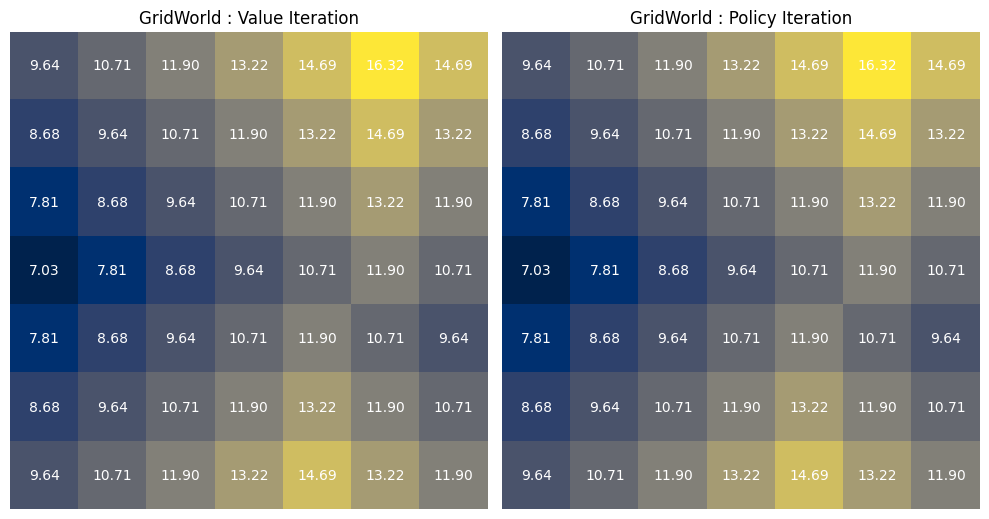

In [24]:
plot_heatmap(v_vi, v_pi)